In [7]:
# import dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#### Read in Data


In [8]:
df = pd.read_csv('data/crime.csv',encoding='ISO-8859-1')

df.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"


## Taking a look at our data.

In [9]:
print(df.info())
print(' ')
print(df.describe())
print(' ')
print(df.shape)
print(' ')
print(df.columns)
print(' ')
print(df.dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319073 entries, 0 to 319072
Data columns (total 17 columns):
INCIDENT_NUMBER        319073 non-null object
OFFENSE_CODE           319073 non-null int64
OFFENSE_CODE_GROUP     319073 non-null object
OFFENSE_DESCRIPTION    319073 non-null object
DISTRICT               317308 non-null object
REPORTING_AREA         319073 non-null object
SHOOTING               1019 non-null object
OCCURRED_ON_DATE       319073 non-null object
YEAR                   319073 non-null int64
MONTH                  319073 non-null int64
DAY_OF_WEEK            319073 non-null object
HOUR                   319073 non-null int64
UCR_PART               318983 non-null object
STREET                 308202 non-null object
Lat                    299074 non-null float64
Long                   299074 non-null float64
Location               319073 non-null object
dtypes: float64(2), int64(4), object(11)
memory usage: 41.4+ MB
None
 
        OFFENSE_CODE           YEAR     

#### Lets take a look at any missing data
From the heatmap below we can see that the shooting column contains mostly NaN values. Not sure if these NaN values mean there was not a shooting or is it just missing information?

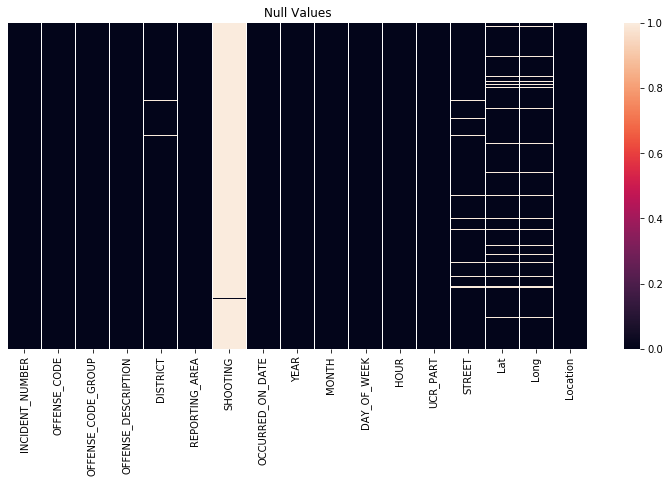

In [10]:
figure = plt.figure(figsize=(13,6))
sns.heatmap(df.isnull(),yticklabels='')
plt.title('Null Values')

plt.savefig('images/nullValueHeatMap.png',bbox_inches = 'tight')

In [11]:
# DROP NULL VALUES ??????

### Overview of Offenses

#### Top ten Offenses

In [12]:
# create DF of unique offense and how many times they occured. 
offenseCounts = pd.DataFrame(df['OFFENSE_CODE_GROUP'].value_counts()).reset_index()
# rename columns
offenseCounts.rename(columns={'index':'Offense','OFFENSE_CODE_GROUP':'Count'}, inplace=True)
offenseCounts.head(10)

,Offense,Count
0,Motor Vehicle Accident Response,37132
1,Larceny,25935
2,Medical Assistance,23540
3,Investigate Person,18750
4,Other,18075
5,Drug Violation,16548
6,Simple Assault,15826
7,Vandalism,15415
8,Verbal Disputes,13099
9,Towed,11287


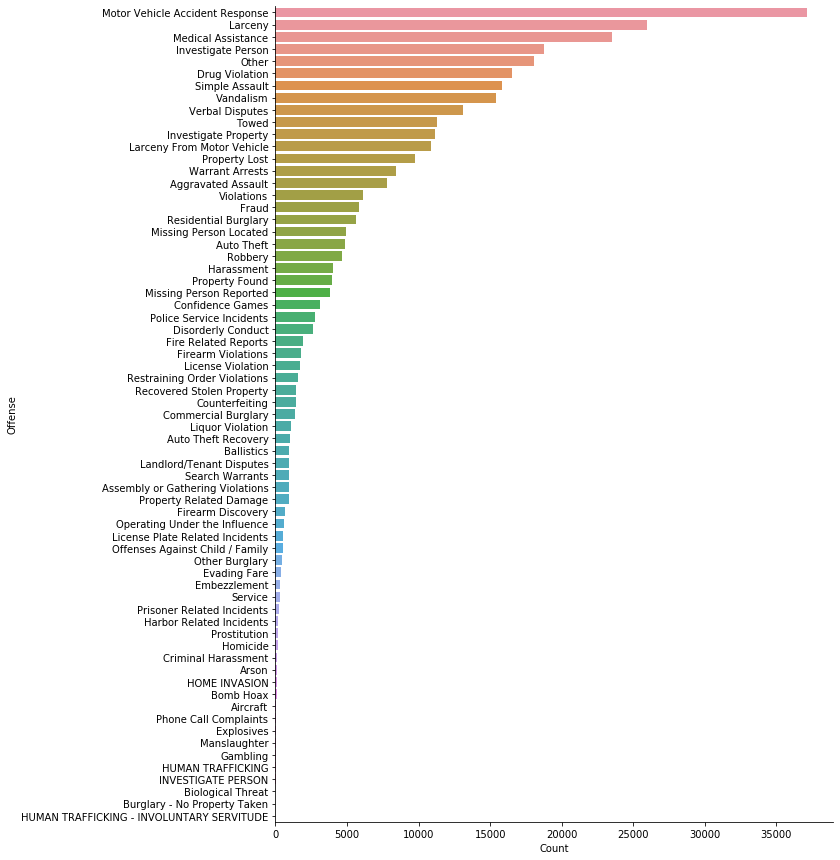

In [18]:
figure = plt.figure(figsize=(10,15))
sns.barplot(x=offenseCounts['Count'],y=offenseCounts['Offense'],)
plt.ylabel('Offense')
plt.xlabel('Count')
sns.despine()
plt.savefig('images/offenseCount.png',bbox_inches = 'tight')

### Are certain areas more  susceptible to crime?

In [14]:
crimeAreas = pd.DataFrame(df['STREET'].value_counts()).reset_index()
crimeAreas.rename(columns={'index':'Street','STREET':'Count'},inplace=True)
crimeAreas.head(10)

,Street,Count
0,WASHINGTON ST,14194
1,BLUE HILL AVE,7794
2,BOYLSTON ST,7221
3,DORCHESTER AVE,5149
4,TREMONT ST,4796
5,MASSACHUSETTS AVE,4708
6,HARRISON AVE,4609
7,CENTRE ST,4383
8,COMMONWEALTH AVE,4134
9,HYDE PARK AVE,3470


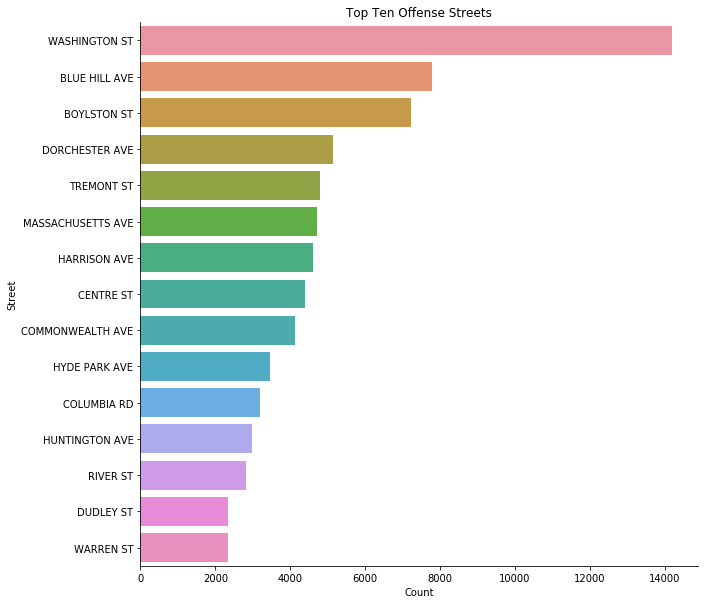

In [97]:
figure = plt.figure(figsize=(10,10))

sns.barplot(x=crimeAreas['Count'].iloc[:15],y=crimeAreas['Street'].iloc[:15])
plt.ylabel('Street')
plt.xlabel('Count')
plt.title('Top Ten Offense Streets')
sns.despine()
plt.savefig('images/streetsOffenseCount.png',bbox_inches = 'tight')

### Which districts have the highest rate of offenses?

In [24]:
districtCrimeRate = pd.DataFrame(df['DISTRICT'].value_counts()).reset_index()
districtCrimeRate.rename(columns={'index':'District','DISTRICT':'Count'},inplace=True)
districtCrimeRate.head(10)

,District,Count
0,B2,49945
1,C11,42530
2,D4,41915
3,A1,35717
4,B3,35442
5,C6,23460
6,D14,20127
7,E13,17536
8,E18,17348
9,A7,13544


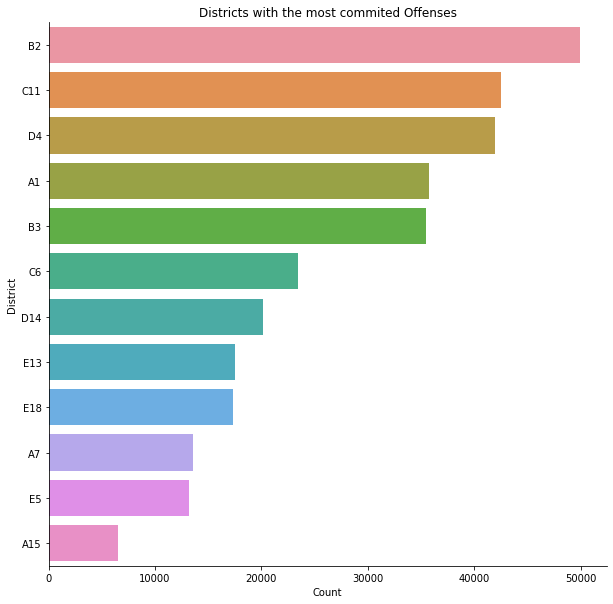

In [184]:
figure = plt.figure(figsize=(10,10))

sns.barplot(x=districtCrimeRate['Count'].iloc[:15],y=districtCrimeRate['District'].iloc[:15])
plt.ylabel('District')
plt.xlabel('Count')
plt.title('Districts with the most commited Offenses')
sns.despine()
plt.savefig('images/districtOffenseCount.png',bbox_inches = 'tight')

### Offenses by District

In [118]:
offenseByDistrict = pd.DataFrame(df.groupby(['DISTRICT','OFFENSE_CODE_GROUP'])['OFFENSE_CODE_GROUP'].count())

offenseByDistrict.rename(columns={'OFFENSE_CODE_GROUP':'Count'},inplace=True)

# offenseByDistrict.reset_index(inplace=True)

offenseByDistrict.sort_values(['DISTRICT','Count'],ascending=False,inplace=True)

offenseByDistrict.head()

Count
DISTRICT OFFENSE_CODE_GROUP                    
E5       Motor Vehicle Accident Response   1813
         Medical Assistance                1509
         Investigate Person                1059
         Other                              804
         Drug Violation                     705

### Offenses by District according to Overall Top Ten Offenses

In [204]:
# grab list of top ten offense from offenseCounts table
topTenOffensesList = (offenseCounts['Offense'].loc[:10]).tolist()
print(topTenOffensesList)

# reset index of offenseByDistrict Table 
offenseByDistrictPlot = offenseByDistrict.reset_index()
# filter table by top ten offenses
offenseByDistrictPlot = pd.DataFrame(offenseByDistrictPlot[offenseByDistrictPlot['OFFENSE_CODE_GROUP'].isin(topTenOffensesList)])

offenseByDistrictPlot.head()

,DISTRICT,OFFENSE_CODE_GROUP,Count
0,E5,Motor Vehicle Accident Response,1813
1,E5,Medical Assistance,1509
2,E5,Investigate Person,1059
3,E5,Other,804
4,E5,Drug Violation,705


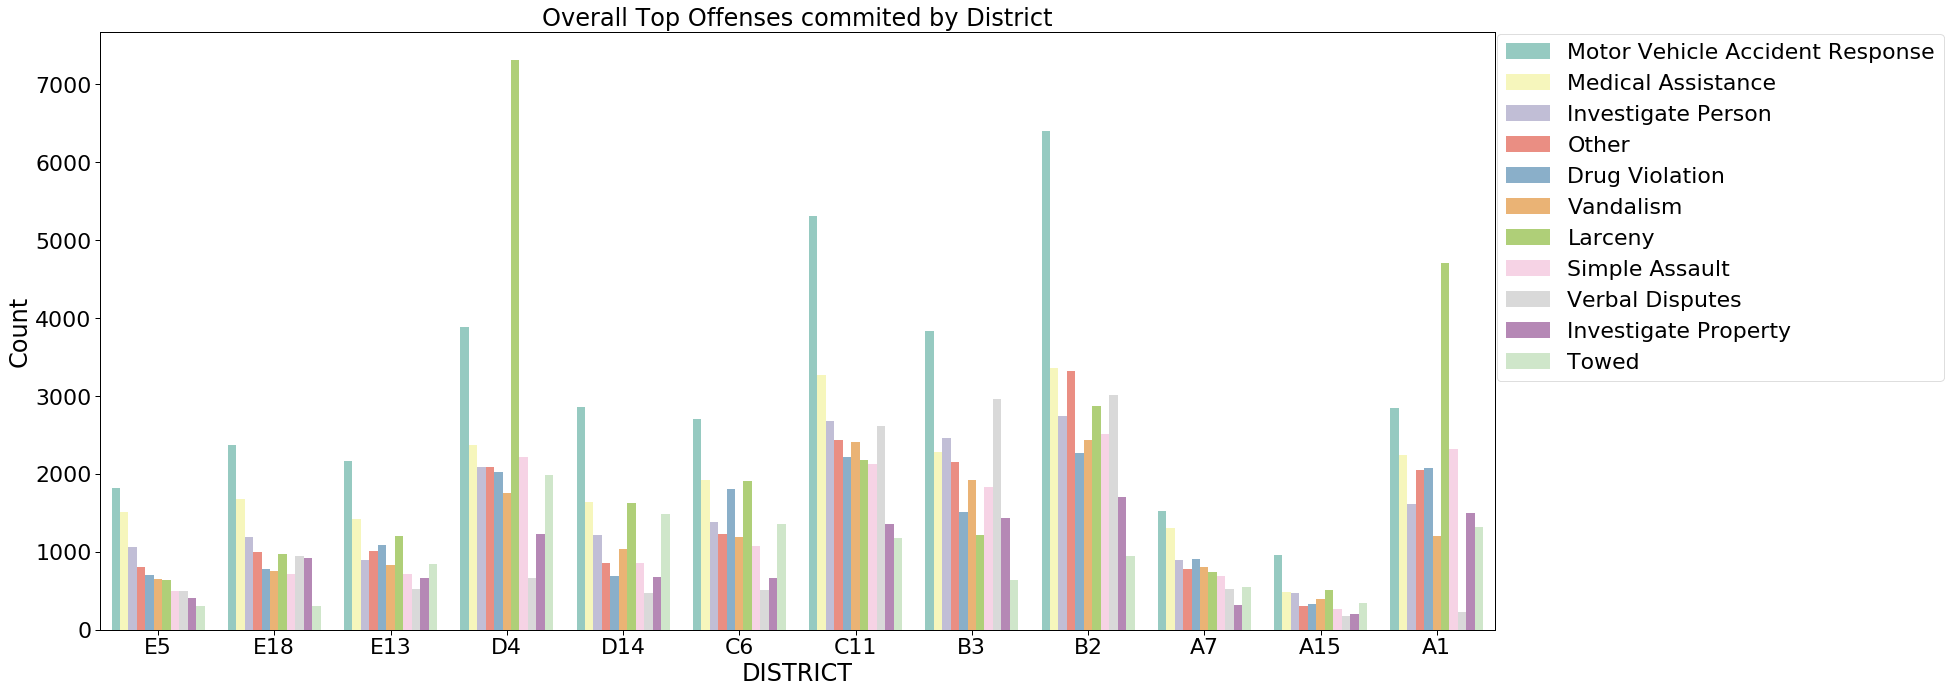

In [266]:
sns.set_context('paper',font_scale=2.5)
figure = plt.figure(figsize=(25,11))

sns.barplot(x=offenseByDistrictPlot['DISTRICT'],y=offenseByDistrictPlot['Count'],hue=offenseByDistrictPlot['OFFENSE_CODE_GROUP'],palette='Set3')
plt.legend(bbox_to_anchor=(1,1), loc=2, borderaxespad=0.1)
plt.title('Overall Top Offenses commited by District')
# plt.ylabel('Count',{'fontsize':22})
# plt.xlabel('District',{'fontsize':22})

plt.savefig('images/offensesByDistrict.png',bbox_inches = 'tight')

### Highest committed offenses by District

In [92]:
topOffensesByDistrict = pd.DataFrame(offenseByDistrict.sort_values(by=['Count'],ascending=False))
topOffensesByDistrict.reset_index(inplace=True)
districts = df['DISTRICT'].unique()
topOffensesByDistrict.head(10)


,DISTRICT,OFFENSE_CODE_GROUP,Count
0,D4,Larceny,7313
1,B2,Motor Vehicle Accident Response,6407
2,C11,Motor Vehicle Accident Response,5305
3,A1,Larceny,4704
4,D4,Motor Vehicle Accident Response,3882
5,B3,Motor Vehicle Accident Response,3836
6,B2,Medical Assistance,3353
7,B2,Other,3325
8,C11,Medical Assistance,3274
9,B2,Verbal Disputes,3008


In [28]:
df.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"


In [191]:
test = pd.DataFrame(df[df['OFFENSE_CODE'] == 619])
test

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
45,I182070885,619,Larceny,LARCENY ALL OTHERS,B3,456,NaN,2018-09-03 17:17:00,2018,9,Monday,17,Part One,ELLINGTON ST,42.301546,-71.081182,"(42.30154555, -71.08118184)"
110,I182070816,619,Larceny,LARCENY ALL OTHERS,C6,185,NaN,2018-09-03 12:45:00,2018,9,Monday,12,Part One,MASSACHUSETTS AVE,42.321987,-71.062807,"(42.32198656, -71.06280666)"
150,I182070777,619,Larceny,LARCENY ALL OTHERS,C11,388,NaN,2018-08-23 13:34:00,2018,8,Thursday,13,Part One,ADAMS ST,42.272306,-71.067214,"(42.27230624, -71.06721386)"
205,I182070707,619,Larceny,LARCENY ALL OTHERS,D14,782,NaN,2018-09-02 23:12:00,2018,9,Sunday,23,Part One,GORDON ST,42.352935,-71.140501,"(42.35293536, -71.14050052)"
213,I182070696,619,Larceny,LARCENY ALL OTHERS,D4,623,NaN,2018-09-02 22:15:00,2018,9,Sunday,22,Part One,COMMONWEALTH AVE,42.348776,-71.096068,"(42.34877575, -71.09606805)"
291,I182070607,619,Larceny,LARCENY ALL OTHERS,E18,519,NaN,2018-08-24 00:00:00,2018,8,Friday,0,Part One,WALTER ST,42.256679,-71.118540,"(42.25667872, -71.11853971)"
301,I182070596,619,Larceny,LARCENY ALL OTHERS,C6,216,NaN,2018-09-02 17:29:00,2018,9,Sunday,17,Part One,F ST,42.333829,-71.051287,"(42.33382906, -71.05128729)"
367,I182070525,619,Larceny,LARCENY ALL OTHERS,C11,397,NaN,2018-09-02 11:45:00,2018,9,Sunday,11,Part One,TALBOT AVE,42.288638,-71.066316,"(42.28863812, -71.06631579)"
388,I182070499,619,Larceny,LARCENY ALL OTHERS,C6,186,NaN,2018-09-02 09:17:00,2018,9,Sunday,9,Part One,ALLSTATE RD,42.328100,-71.063217,"(42.32809966, -71.06321676)"
